# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [6]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [7]:
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


## Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)    # random_state = number of shuffles

In [9]:
print(X_train)

[[    57 122000]
 [    39  71000]
 [    47  25000]
 [    24  19000]
 [    36  50000]
 [    32 150000]
 [    48  29000]
 [    30 107000]
 [    60  34000]
 [    38  61000]
 [    33  31000]
 [    39  71000]
 [    55  39000]
 [    49  39000]
 [    43 112000]
 [    27  20000]
 [    26  17000]
 [    37  93000]
 [    42  54000]
 [    35  61000]
 [    29  75000]
 [    38  80000]
 [    45  26000]
 [    54 108000]
 [    46  23000]
 [    23  28000]
 [    37  75000]
 [    42  65000]
 [    35  71000]
 [    51 146000]
 [    39  96000]
 [    24  89000]
 [    58  95000]
 [    25  22000]
 [    41  59000]
 [    28  89000]
 [    42  80000]
 [    42 108000]
 [    46  96000]
 [    47 113000]
 [    33  28000]
 [    19  25000]
 [    49  89000]
 [    31  15000]
 [    30  79000]
 [    48 141000]
 [    32 117000]
 [    37  71000]
 [    18  86000]
 [    42  79000]
 [    27  84000]
 [    40  65000]
 [    57  74000]
 [    26  15000]
 [    26  80000]
 [    29  43000]
 [    33 149000]
 [    39  42000]
 [    54 10400

In [10]:
print(y_train)

[1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0
 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0
 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1
 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0]


In [11]:
print(X_test)

[[    46  22000]
 [    59  88000]
 [    28  44000]
 [    48  96000]
 [    29  28000]
 [    30  62000]
 [    47 107000]
 [    29  83000]
 [    40  75000]
 [    42  65000]
 [    35  65000]
 [    53  34000]
 [    23  48000]
 [    20  23000]
 [    30  87000]
 [    35 108000]
 [    52  38000]
 [    46  74000]
 [    39  42000]
 [    56  60000]
 [    22  27000]
 [    29  80000]
 [    47  23000]
 [    59  76000]
 [    19  19000]
 [    51  23000]
 [    42  80000]
 [    37  53000]
 [    55 125000]
 [    19  21000]
 [    46  41000]
 [    19  70000]
 [    36 144000]
 [    28  79000]
 [    40 107000]
 [    35  75000]
 [    37  55000]
 [    38  65000]
 [    26  30000]
 [    18  68000]
 [    48  33000]
 [    24  55000]
 [    18  52000]
 [    47  20000]
 [    20  49000]
 [    44 139000]
 [    29  61000]
 [    31  71000]
 [    48  41000]
 [    34  43000]
 [    25  79000]
 [    53  82000]
 [    38  55000]
 [    25  80000]
 [    37  80000]
 [    27  31000]
 [    60 102000]
 [    26 118000]
 [    31  7400

In [13]:
print(y_test)

[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0
 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1]


## Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
print(X_train)

[[ 1.8925893   1.52189404]
 [ 0.1250379   0.03213212]
 [ 0.9106163  -1.31157471]
 [-1.34792161 -1.48684082]
 [-0.169554   -0.58129926]
 [-0.56234321  2.33980255]
 [ 1.0088136  -1.19473064]
 [-0.75873781  1.08372877]
 [ 2.1871812  -1.04867555]
 [ 0.0268406  -0.25997806]
 [-0.46414591 -1.1363086 ]
 [ 0.1250379   0.03213212]
 [ 1.6961947  -0.90262046]
 [ 1.1070109  -0.90262046]
 [ 0.5178271   1.22978386]
 [-1.05332971 -1.4576298 ]
 [-1.15152701 -1.54526286]
 [-0.0713567   0.67477452]
 [ 0.4196298  -0.46445519]
 [-0.2677513  -0.25997806]
 [-0.85693511  0.14897619]
 [ 0.0268406   0.29503128]
 [ 0.7142217  -1.28236369]
 [ 1.5979974   1.11293979]
 [ 0.812419   -1.36999675]
 [-1.44611891 -1.22394166]
 [-0.0713567   0.14897619]
 [ 0.4196298  -0.14313399]
 [-0.2677513   0.03213212]
 [ 1.3034055   2.22295848]
 [ 0.1250379   0.76240757]
 [-1.34792161  0.55793045]
 [ 1.9907866   0.73319655]
 [-1.24972431 -1.39920777]
 [ 0.3214325  -0.3184001 ]
 [-0.95513241  0.55793045]
 [ 0.4196298   0.29503128]
 

In [16]:
print(X_test)

[[ 0.812419   -1.39920777]
 [ 2.0889839   0.52871943]
 [-0.95513241 -0.75656537]
 [ 1.0088136   0.76240757]
 [-0.85693511 -1.22394166]
 [-0.75873781 -0.23076704]
 [ 0.9106163   1.08372877]
 [-0.85693511  0.38266434]
 [ 0.2232352   0.14897619]
 [ 0.4196298  -0.14313399]
 [-0.2677513  -0.14313399]
 [ 1.4998001  -1.04867555]
 [-1.44611891 -0.6397213 ]
 [-1.74071081 -1.36999675]
 [-0.75873781  0.49950841]
 [-0.2677513   1.11293979]
 [ 1.4016028  -0.93183148]
 [ 0.812419    0.11976517]
 [ 0.1250379  -0.8149874 ]
 [ 1.794392   -0.28918908]
 [-1.54431621 -1.25315268]
 [-0.85693511  0.29503128]
 [ 0.9106163  -1.36999675]
 [ 2.0889839   0.17818721]
 [-1.83890811 -1.48684082]
 [ 1.3034055  -1.36999675]
 [ 0.4196298   0.29503128]
 [-0.0713567  -0.49366621]
 [ 1.6961947   1.6095271 ]
 [-1.83890811 -1.42841878]
 [ 0.812419   -0.84419842]
 [-1.83890811  0.0029211 ]
 [-0.169554    2.16453644]
 [-0.95513241  0.26582026]
 [ 0.2232352   1.08372877]
 [-0.2677513   0.14897619]
 [-0.0713567  -0.43524417]
 

## Training the K-NN model on the Training set

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting a new result

In [26]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


## Predicting the Test set results

In [32]:
y_pred = classifier.predict(X_test)      # Compare the test set with the result
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]]


## Making the Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score    # Compare the prediction with the test result
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[59  4]
 [ 3 34]]


0.93

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score  
mae = mean_absolute_error(y_test,y_pred)     # 
mse = mean_squared_error(y_test,y_pred)      #
r2 = r2_score(y_test,y_pred)                 # How many percentages of changes in the independant variables are going to affect the target value, closer to one = the model is a better fit 
print(f' the mean absolute value for our model is',mae)
print(f' the mean square value for our model is',mse)
print(f' the r2 score for our model is',r2)

 the mean absolute value for our model is 0.07
 the mean square value for our model is 0.07
 the r2 score for our model is 0.6996996996996996


In [35]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt



diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
X2 = sm.add_constant(X) 
est = sm.OLS(y, X2)
est2 = est.fit()
print("summary()\n",est2.summary())
print("pvalues\n",est2.pvalues)
print("tvalues\n",est2.tvalues)
print("rsquared\n",est2.rsquared)
print("rsquared_adj\n",est2.rsquared_adj)

#All the attributes 
for attr in dir(est2):
    if not attr.startswith('_'):
        print(attr)

predictions = est2.predict(X2)

print(est2.predict(X2[:3,:]))

from sklearn.metrics import r2_score
print("r2_score",r2_score(y,predictions))

summary()
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           3.83e-62
Time:                        17:11:23   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.0

In [36]:
import seaborn as sns

Text(0.5, 257.44, 'Predicted label')

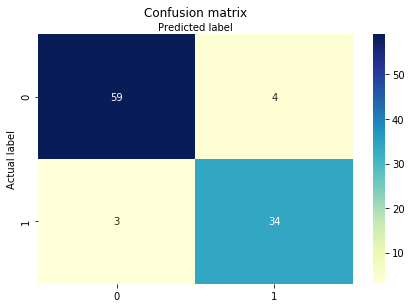

In [37]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Visualising the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


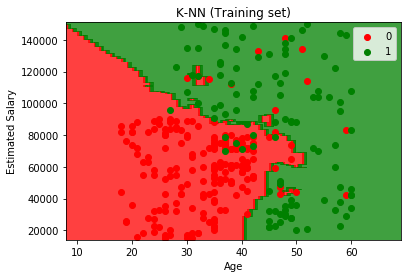

In [40]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


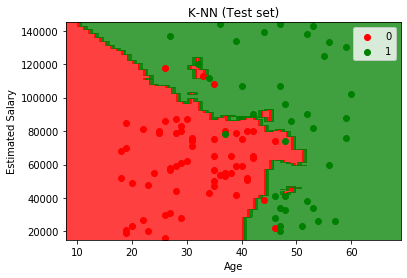

In [42]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()